In [ ]:
import matplotlib.pyplot as plt
import time as tm
import numpy as np
import math as mt
import random as rn

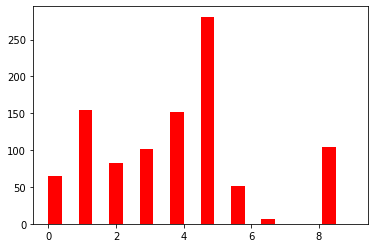

Unordered: 0.0009877681732177734


In [ ]:
arr = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
s_t = tm.time()
arr_1 = arr / arr.sum()
arr_1 = arr_1.cumsum()
rnd = np.random.rand(1000)
random = np.searchsorted(arr_1, rnd)
e_t = tm.time()
plt.hist(random, width = 0.4, color = 'red')
plt.show()
print('Unordered:', e_t - s_t)

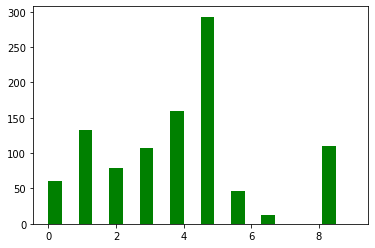

Ordered: 0.0009918212890625


In [ ]:
arr_2 = np.sort(arr)
s_t = tm.time()
ind = np.argsort(arr)
arr_2 /= arr_2.sum()
arr_2 = arr_2.cumsum()
rnd = np.random.rand(1000)
random = ind[np.searchsorted(arr_2, rnd)]
e_t = tm.time()
plt.hist(random, width = 0.4, color = 'green')
plt.show()
print('Ordered:', e_t - s_t)

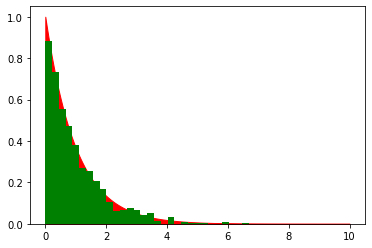

In [ ]:
lam = 1
rnd = np.random.rand(1000)
random = [-1 / lam * np.log(1 - rnd[i]) for i in range(1000)]
plt.hist(random, bins = 30, density = True, color = 'green')

X = np.linspace(0, 10, 256)
D = lam * np.exp(-lam * X)
plt.fill_between(X, 0, D, color = 'red')
plt.show()

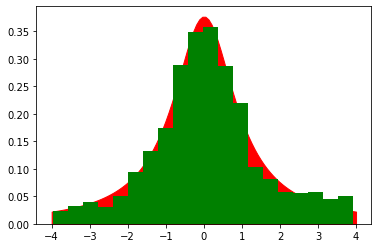

In [ ]:
k = 1 / (2 * mt.atan(4))
n = 0
res = []
while(n < 1000):
    x = rn.uniform(-4, 4)
    y = rn.uniform(0, k)
    if(y < k / (1 + x * x)):
        res.append(x)
        n += 1
plt.hist(res, bins = 20, density = True, color = 'green')

X = np.linspace(-4, 4, 100)
D = k / (1 + X ** 2)
plt.fill_between(X, 0, D, color = 'r')
plt.show()

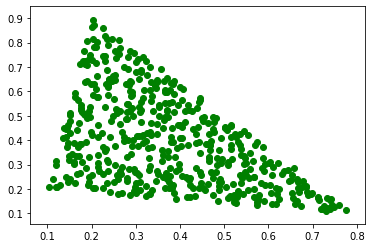

In [ ]:
rnd_0 = np.random.rand(500)
rnd_1 = np.array([(1 - mt.sqrt(1 - rnd_0[i])) for i in range(500)])
rnd_2 = np.random.rand(500) * (1 - rnd_1)
rnd_x = 0.1 + 0.7 * rnd_1 + 0.1 * rnd_2
rnd_y = 0.2 - 0.1 * rnd_1 + 0.7 * rnd_2
plt.scatter(rnd_x, rnd_y, color = 'green')
plt.show()

#Из условий 0.1 < x < 0.9 , 0.1 < y < 0.9 и уравнений отрезков находим коэффициенты

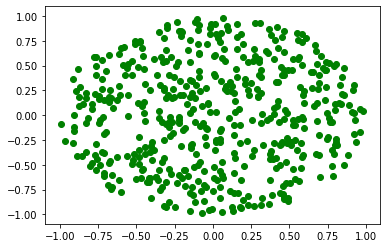

In [ ]:
rnd_r = np.sqrt(np.random.rand(500))
rnd_phi = np.random.rand(500) * 2 * np.pi
plt.scatter(rnd_r * np.cos(rnd_phi), rnd_r * np.sin(rnd_phi), color = 'green')
plt.show()

#Переходим к полярным координатам и берём равномерное распределение на квадрате

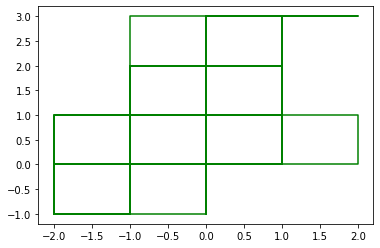

In [ ]:
rnd_1 = np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
rnd_2 = np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
rnd_3 = np.full(100, 1)
rnd_3[rnd_1] = -1
rnd_4 = np.full(100, 1)
rnd_4[rnd_2] = -1
rnd_3 = rnd_3.cumsum()
rnd_4 = rnd_4.cumsum()
rnd_x = (rnd_3 + rnd_4) / 2
rnd_y = (rnd_3 - rnd_4) / 2
np.insert(rnd_x, 0, 0)
np.insert(rnd_y, 0, 0)
plt.plot(rnd_x, rnd_y, color = 'green')
plt.show()

#По каждой координате рассматривается случайное блуждание

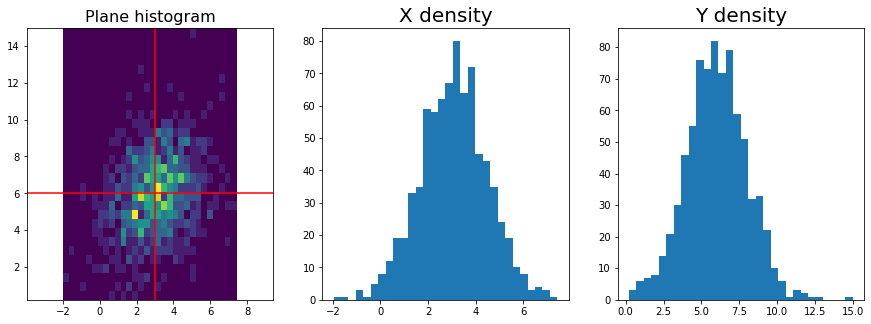

In [ ]:
n = 0
x = []
y = []
while(n < 1000):
    u= rn.uniform(-1, 1)
    v = rn.uniform(-1, 1)
    s = u * u + v * v
    if(s > 0 and s <= 1):
        x.append(u * mt.sqrt(-2 * mt.log(s) / s))
        y.append(v * mt.sqrt(-2 * mt.log(s) / s))
    n += 1
x = np.array(x)
y = np.array(y)
#получили N(0, E), домножаем на матрицу 
y *= mt.sqrt(7 / 2)
y += 1 / mt.sqrt(2) * x
x *= mt.sqrt(2)
#теперь смещаем
x += 3
y += 6
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("Plane histogram", size = '16')
ax[1].set_title("X density", size = 20)
ax[2].set_title("Y density", size = 20)
ax[0].axvline(3, color='red')
ax[0].axhline(6, color='red')
plt.show()

#Выведены распредление на плоскости и маргинальные распределения по осям
#Используем вариант формулы с логарифмом.
#Далее мы "домножаем" полученные выражения на матрицу, чтобы получить требуемые ковариации. Осталось только сместить
#покоординатно функции на нужный вектор (мат. ожидание).

In [ ]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
print(np.linalg.det(B))
print(np.linalg.det(B[np.arange(8)][:, np.arange(8)]))

#Матрица вырождена, но её предпоследний главный минор невырожден. Разлагаем её.

0.0
10125.000000000007


In [ ]:
A = np.zeros((9, 9))
A8 = np.linalg.cholesky(B[np.arange(8)][:, np.arange(8)])

In [ ]:
for i in range(8):
    for j in range(8):
        A[i, j] = A8[i, j]
A[8] = -A[0] - A[4]

#Можем приравнять, т.к. последняя строка выражается через первую и пятую строки.

In [ ]:
rnd_1 = np.random.normal(size = (9, 1000000))
rnd_2 = np.dot(A, rnd_1)
print(np.linalg.norm(np.cov(rnd_2) - B, ord = 1))

#Получаем практически ту же матрицу.

0.04264385742546943


In [ ]:
print(np.round(np.pi * (4 - np.pi) * (10 ** 8)).astype(int) + 1)


269676622


In [ ]:
S_n = 0
n = 0
while(True):
    x = rn.uniform(-1, 1)
    y = rn.uniform(-1, 1)
    if(x * x + y * y <= 1):
        S_n += 4
    n += 1
    if(abs(S_n / n - np.pi) < 0.001):
        print(n)
        break

#В жизни достаточно сильно меньшего количества бросаний

149


In [ ]:
C = np.zeros((101, 101))
for i in range(101):
    C[i, 0] = 1
    for j in range(1, i + 1):
        C[i, j] = C[i - 1, j - 1] + C[i - 1, j]
        
#Количество разбиений можно представить как количество способов расставить "перегородки" между подмножествами

In [ ]:
B = np.zeros(101)
B[0] = 1
for i in range(1, 101):
    S = 0
    for j in range(i):
        S += C[i - 1, j] * B[j]
    B[i] = S 

In [ ]:
res = 0
for i in range(100000):
    x = rn.random()
    S = 0
    K = 0
    while(S < x):
        K += 1
        S += K ** 100 / (mt.factorial(K) * np.e * B[100])
    C = np.random.randint(1, K + 1, 100)
    res += len(np.unique(C))
print(0.00001 * res)

#При таком количестве испытаний в силу ЗБЧ попадание в нужную величину практически гарантированно

28.608050000000002
